# EDA- Human Eval

This notebook has the goal to explore the following questions:

- What are the differnt tasks presents in the benchmark?
- Length distribution for input, output and number of tests?
- What is the presence of null values?

## Conclusions

- The dataset has 164 examples of programming problems which six of them referes to the same problem but with different prompts
- The prompts and canonical results are long, so it's not suitable to use models with a low token-window size, like GPT2

## Next Steps:
- Generate the dataset through the human_eval lib
- Donwload Code-BERT as baseline model

In [ ]:
import polars as pl
import numpy as np
import seaborn as sns
import plotly.express as px
from datasets import load_dataset

## PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


## Load Dataset

In [14]:
dataset = load_dataset("openai_humaneval")
dataset

Generating test split: 100%|██████████| 164/164 [00:00<00:00, 2136.27 examples/s]


DatasetDict({
    test: Dataset({
        features: ['task_id', 'prompt', 'canonical_solution', 'test', 'entry_point'],
        num_rows: 164
    })
})

In [22]:
df = pl.DataFrame(dataset["test"][0:164])
df.head()

task_id,prompt,canonical_solution,test,entry_point
str,str,str,str,str
"""HumanEval/0""","""from typing import List def …",""" for idx, elem in enumerate…",""" METADATA = { 'author': '…","""has_close_elements"""
"""HumanEval/1""","""from typing import List def …",""" result = [] current_st…",""" METADATA = { 'author': '…","""separate_paren_groups"""
"""HumanEval/2""",""" def truncate_number(number: …",""" return number % 1.0 """,""" METADATA = { 'author': '…","""truncate_number"""
"""HumanEval/3""","""from typing import List def …",""" balance = 0 for op in…",""" METADATA = { 'author': '…","""below_zero"""
"""HumanEval/4""","""from typing import List def …",""" mean = sum(numbers) / len(…",""" METADATA = { 'author': '…","""mean_absolute_deviation"""


## Number of Samples

In [25]:
df.select(pl.col("entry_point")).count()

entry_point
u32
164


## Number of Tasks

In [24]:
df.select(pl.col("entry_point")).unique().count()

entry_point
u32
158


In [30]:
df.group_by(pl.col("entry_point")).count().filter(pl.col("count") > 1)

/tmp/ipykernel_602379/630002040.py:1: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  df.group_by(pl.col("entry_point")).count().filter(pl.col("count") > 1)


entry_point,count
str,u32
"""sum_squares""",2
"""add""",2
"""correct_bracketing""",2
"""triangle_area""",2
"""solve""",2
"""sort_array""",2


In [77]:
df.filter(pl.col("entry_point")=="sum_squares").select("prompt").to_numpy()

array([['\n\ndef sum_squares(lst):\n    """You are given a list of numbers.\n    You need to return the sum of squared numbers in the given list,\n    round each element in the list to the upper int(Ceiling) first.\n    Examples:\n    For lst = [1,2,3] the output should be 14\n    For lst = [1,4,9] the output should be 98\n    For lst = [1,3,5,7] the output should be 84\n    For lst = [1.4,4.2,0] the output should be 29\n    For lst = [-2.4,1,1] the output should be 6\n    \n\n    """\n'],
       ['\n\n\ndef sum_squares(lst):\n    """"\n    This function will take a list of integers. For all entries in the list, the function shall square the integer entry if its index is a \n    multiple of 3 and will cube the integer entry if its index is a multiple of 4 and not a multiple of 3. The function will not \n    change the entries in the list whose indexes are not a multiple of 3 or 4. The function shall then return the sum of all entries. \n    \n    Examples:\n    For lst = [1,2,3] the ou

## Size Distribution - Input

<Axes: xlabel='prompt_len', ylabel='Count'>

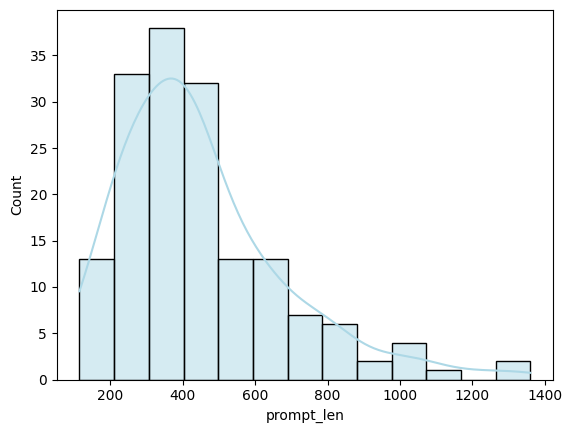

In [ ]:


_v1 = (df
    .with_columns([pl.col("prompt").str.len_chars().alias("prompt_len")])
    .select(["prompt_len"])
)

sns.histplot(
    data=_v1,
    x="prompt_len",
    kde=True,
    color="lightblue"
)

## Size Distribution - Canonical Output

<Axes: xlabel='canonical_len', ylabel='Count'>

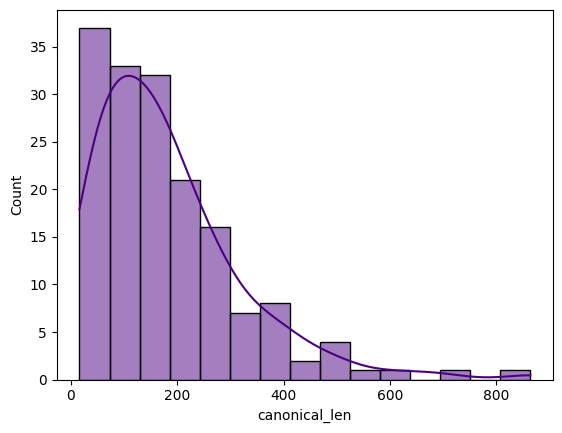

In [62]:
_v2 = (df
    .with_columns([pl.col("canonical_solution").str.len_chars().alias("canonical_len")])
    .select(["canonical_len"])
)

sns.histplot(
    data=_v2,
    x="canonical_len",
    kde=True,
    color="indigo"
)

## Size Distribution - Number of Tests

<Axes: xlabel='number_test', ylabel='Count'>

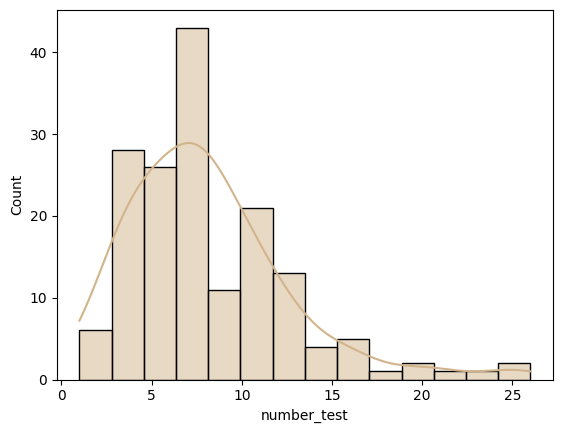

In [74]:
_v3 = df.select(["test"]).with_columns(pl.col("test").str.count_matches("assert").alias("number_test"))
sns.histplot(
    data=_v3,
    x="number_test",
    kde=True,
    color="tan"
)